In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-companies/Ai_companies.csv


## Data Cleaning

In [43]:
df = pd.read_csv('/kaggle/input/ai-companies/Ai_companies.csv')
df

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,"Hangzhou, China",2009,$479.5 million,3.7/5
1,DataRobot,Best for Automated Machine Learning,"Boston, Massachusetts",2012,$338.2 million,3.7/5
2,Google,Best for AI Development,"Mountain View, California",1998,$305.6 billion,4.4/5
3,Hugging Face,Best for Deploying AI Models in the Cloud,"Brooklyn, New York",2016,$40 million,4.3/5
4,H2O.ai,Best for Time Series Forecasting,"Mountain View, California",2011,$69.2 million,3.1/5
...,...,...,...,...,...,...
95,Nuro,Best for Driverless Operation,"Mountain View, California",2016,$438.8 million,3.8/5
96,Pony.ai,Best for Robotruck Development,"Fremont, California",2016,$100 million,3.4/5
97,Tesla,Best for Electric Vehicles,"Austin, Texas",2003,$96.77 billion,3.6/5
98,Waymo,Best for Experience and Testing,"Mountain View, California",2016,$1.4 billion,3.7/5


In [44]:
df['Headquarters'] = df['Headquarters'].apply(lambda x: x.split(',')[-1].strip())

Keeping only the Country/State names.

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     100 non-null    object
 1   Description      100 non-null    object
 2   Headquarters     100 non-null    object
 3   Founded          100 non-null    int64 
 4   Annual Revenue   100 non-null    object
 5   Glassdoor Score  98 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [46]:
df["Glassdoor Score"] = df["Glassdoor Score"].str.replace("/5", "")

I was trying to extract only the ratings but I was getting an unexpected error of "5 Apr" When checked i found 5 companies that had a rating of 4 were having the values "5 Apr". It maybe a scrapping issue. Will try to find and fix it. Till then you may either replace it too or chooseto remove them from dataset. 

In [47]:
df['Glassdoor Score'].unique()

array(['3.7', '4.4', '4.3', '3.1', '3.9', nan, '3.4', '3.8', '4.1', '3.6',
       '4.5', '3.3', '4.8', '3.2', '5-Apr', '4.6', '4.7', '3.5', '4.2',
       '4.9', '2.9'], dtype=object)

In [48]:
df["Glassdoor Score"] = df["Glassdoor Score"].replace("5-Apr", "4")

In [49]:
df.isnull().sum()

Company Name       0
Description        0
Headquarters       0
Founded            0
Annual Revenue     0
Glassdoor Score    2
dtype: int64

Removed the 2 null values.

In [50]:
df = df.dropna().reset_index(drop=True)
df

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,China,2009,$479.5 million,3.7
1,DataRobot,Best for Automated Machine Learning,Massachusetts,2012,$338.2 million,3.7
2,Google,Best for AI Development,California,1998,$305.6 billion,4.4
3,Hugging Face,Best for Deploying AI Models in the Cloud,New York,2016,$40 million,4.3
4,H2O.ai,Best for Time Series Forecasting,California,2011,$69.2 million,3.1
...,...,...,...,...,...,...
93,Nuro,Best for Driverless Operation,California,2016,$438.8 million,3.8
94,Pony.ai,Best for Robotruck Development,California,2016,$100 million,3.4
95,Tesla,Best for Electric Vehicles,Texas,2003,$96.77 billion,3.6
96,Waymo,Best for Experience and Testing,California,2016,$1.4 billion,3.7


In [51]:
def clean_revenue(value):
    if isinstance(value, str):  
        value = value.replace("$", "").strip()  
        num = "".join([c for c in value if c.isdigit() or c == "."])  

        if "billion" in value:
            return float(num)  
        elif "million" in value:
            return float(num) / 1000  
        else:
            return float(num) / 1000 if num else None  
    return None  

df["Annual Revenue"] = df["Annual Revenue"].apply(clean_revenue)


Removed dollar sign and converted millions to billions.

In [52]:
df

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,China,2009,0.4795,3.7
1,DataRobot,Best for Automated Machine Learning,Massachusetts,2012,0.3382,3.7
2,Google,Best for AI Development,California,1998,305.6000,4.4
3,Hugging Face,Best for Deploying AI Models in the Cloud,New York,2016,0.0400,4.3
4,H2O.ai,Best for Time Series Forecasting,California,2011,0.0692,3.1
...,...,...,...,...,...,...
93,Nuro,Best for Driverless Operation,California,2016,0.4388,3.8
94,Pony.ai,Best for Robotruck Development,California,2016,0.1000,3.4
95,Tesla,Best for Electric Vehicles,Texas,2003,96.7700,3.6
96,Waymo,Best for Experience and Testing,California,2016,1.4000,3.7


In [53]:
df["Glassdoor Score"] = pd.to_numeric(df["Glassdoor Score"], errors="coerce")
df["Annual Revenue"] = pd.to_numeric(df["Annual Revenue"], errors="coerce")

Converted the Glassdoor Score and Annual Revenue to appropraite data type i.e numeric.

## Exploratory Data Analysis

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


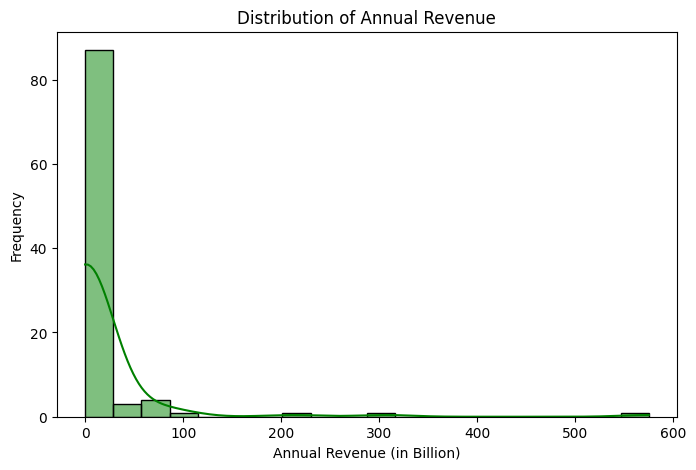

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Annual Revenue"], bins=20, kde=True, color="green")
plt.xlabel("Annual Revenue (in Billion)")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Revenue")
plt.show()


We can see that the distribution of Annual Revenue is right skewed so we will apply log transformtion to the column. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


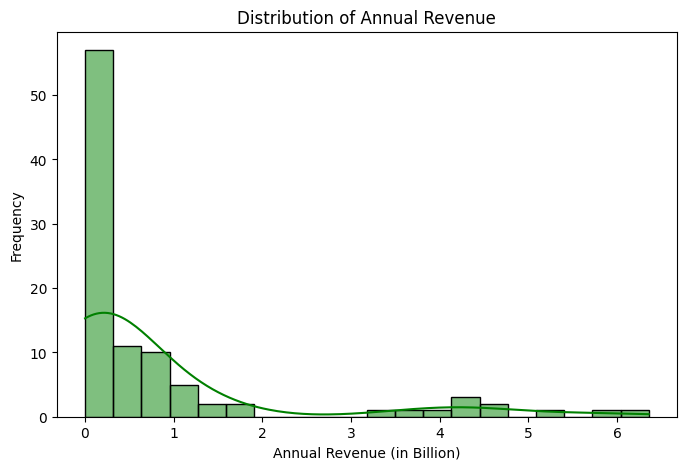

In [56]:
df["Log Revenue"] = np.log1p(df["Annual Revenue"])

plt.figure(figsize=(8, 5))
sns.histplot(df["Log Revenue"], bins=20, kde=True, color="green")
plt.xlabel("Annual Revenue (in Billion)")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Revenue")
plt.show()

Data is still skewed and instead of forcing it to be normal I will let it be. There are companies of different sizes, some are already dominating the markets and for some the it is just the start. I feel its quite normal to have such skewed data when we have such different companies.

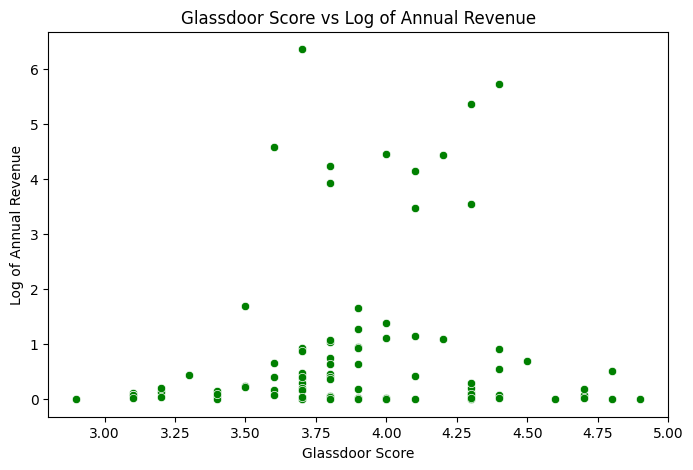

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Glassdoor Score"], y=np.log1p(df["Annual Revenue"]), color="green")
plt.xlabel("Glassdoor Score")
plt.ylabel("Log of Annual Revenue")
plt.title("Glassdoor Score vs Log of Annual Revenue")
plt.show()


There does not seem to be a pattern between Revenue and Glassdoor Score.

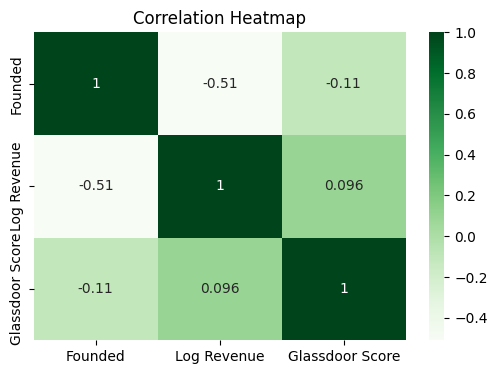

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Founded", "Log Revenue", "Glassdoor Score"]].corr(), 
            annot=True, cmap="Greens")
plt.title("Correlation Heatmap")
plt.show()


Log Revenue and Founded have a strong correlation of -0.51. The data is trying to convey that older comapnies are making more revenue. But let's test this using ANOVA.

## Hypothesis Testing

In [59]:
df["Company Age"] = pd.cut(df["Founded"], 
                           bins=[0, 2000, 2015, 2025], 
                           labels=["Old", "Mid", "New"])
df["Company Age"].value_counts()

Company Age
Mid    57
Old    23
New    18
Name: count, dtype: int64

Before applying ANOVA we are creating three categories of Founding year. Since we are making 3 categories we assume ANOVA to compare the three groups. 

Now we set up hypothesis as:

H₀: The year of founding has no significant effect on annual revenue.

H₁: The year of founding has a significant effect on annual revenue.

In [60]:
from scipy.stats import f_oneway

old = df[df["Company Age"] == "Old"]["Log Revenue"]
mid = df[df["Company Age"] == "Mid"]["Log Revenue"]
new = df[df["Company Age"] == "New"]["Log Revenue"]

f_cal, p_value = f_oneway(old, mid, new)
print(f"F-calculated: {f_cal:.2f}, P-value: {p_value:.8f}")
f_tab = f.ppf(0.95, 2, 95)
print(f"F-tabulated: {f_tab:.4f}")
if (f_cal > f_tab) :
    print("We have enough evidence to reject the null hypothesis. And hence, we conclude that the year of founding has a significant effect on annual revenue.")
else :
    print("We fail to reject the null hypothesis. And hence, we conclude that the year of founding has no significant effect on annual revenue.")

F-calculated: 19.66, P-value: 0.00000007
F-tabulated: 3.0922
We have enough evidence to reject the null hypothesis. And hence, we conclude that the year of founding has a significant effect on annual revenue.


Since we got our test statistically significant. We will find out which group(s) differ.

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df["Log Revenue"], df["Company Age"], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Mid    New  -0.0289 0.9957 -0.8111 0.7533  False
   Mid    Old    1.809    0.0  1.0944 2.5237   True
   New    Old   1.8379    0.0  0.9275 2.7484   True
---------------------------------------------------


We can see that Mid and New companies have no significant difference (Padj(0.9957) > 0.05).
Mid and Old, as well as New and Old, both show significant differences in terms of the mean log revenue. (Padj(0.00) < 0.05).